In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
## import the csv file
df = pd.read_csv('2013_movies.csv')

**Challenge 1**

In [3]:
## Use budget to predict Domestic Total Gross
df_lr = df[['DomesticTotalGross', 'Budget']]
df_lr.dropna(inplace=True)

In [4]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget', data=df_lr, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        22:04:44   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
## predicted value
df_lr['PredictedDTG'] = fit.predict(X)
# This predicts Domestic Total Gross

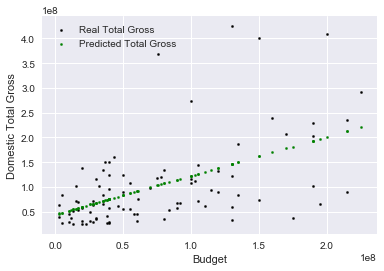

In [6]:
## plot the graph
plt.scatter(df_lr['Budget'], df_lr['DomesticTotalGross'], color='Black', s=5);
plt.xlabel('Budget', verticalalignment='top', horizontalalignment='center');
plt.ylabel('Domestic Total Gross', verticalalignment='bottom', horizontalalignment='center');
plt.scatter(df_lr['Budget'], df_lr['PredictedDTG'], color='green', s=5);
plt.legend(['Real Total Gross', 'Predicted Total Gross'], loc='best');

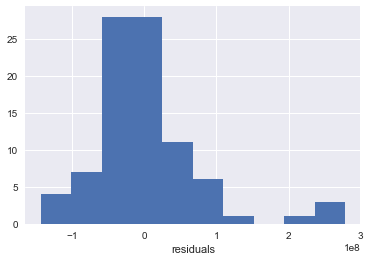

In [7]:
## residuals
df_lr['residuals'] = df_lr['DomesticTotalGross'] - df_lr['PredictedDTG']
plt.hist(df_lr['residuals']);
plt.xlabel('residuals');
# residuals are right-skewed

**Challenge 2**

In [8]:
## Use budget and runtime to predict Domestic Total Gross
df_lr = df[['DomesticTotalGross', 'Budget', 'Runtime']]
df_lr.dropna(inplace=True)

In [9]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget + Runtime', data=df_lr, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     17.63
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           3.83e-07
Time:                        22:04:47   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3481.
Df Residuals:                      86   BIC:                             3489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.731e+06   5.13e+07      0.112      0.911     -9.62e+07  1.08e+08
Budget         0.7456      0.142      5.237      0.000         0.463     1.029
Runtime     3.695e+05   4.75e+05      0.778      0.439     -5.74e+05  1.31e+06
==============================================================================
Omnibus:                       40.192   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.831
Skew:                           1.600   Prob(JB):                     7.72e-23
Kurtosis:                       7.149   Cond. No.                     6.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
## predicted value
df_lr['PredictedDTG'] = fit.predict(X)
# This predicts Domestic Total Gross

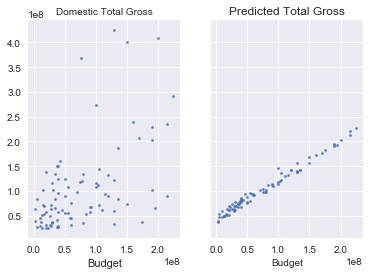

In [26]:
fig, axes = plt.subplots(1, 2, sharey=True);
axes[0].scatter(df_lr['Budget'], df_lr['DomesticTotalGross'], s=5);
axes[0].set_title('Domestic Total Gross', fontsize=10);
axes[0].set_xlabel('Budget');

axes[1].scatter(df_lr['Budget'], df_lr['PredictedDTG'], s=5);
axes[1].set_title('Predicted Total Gross');
axes[1].set_xlabel('Budget', fontsize=10);

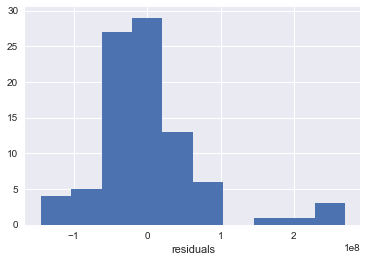

In [27]:
## residuals
df_lr['residuals'] = df_lr['DomesticTotalGross'] - df_lr['PredictedDTG']
plt.hist(df_lr['residuals']);
plt.xlabel('residuals');
# residuals are right-skewed

**Challenge 3**

In [86]:
## Let's add ratings as a categorical feature
df['PG13'] = (df['Rating'] == 'PG-13').apply(lambda s: 1 if s else 0)
df['PG'] = (df['Rating'] == 'PG').apply(lambda s: 1 if s else 0)
df['G'] = (df['Rating'] == 'G').apply(lambda s: 1 if s else 0)
df['R'] = (df['Rating'] == 'R').apply(lambda s: 1 if s else 0)


In [87]:
## Add dummy features
df_lr = df[['DomesticTotalGross', 'Budget', 'PG13', 'PG', 'G', 'R']]
df_lr.dropna(inplace=True)

In [90]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget + PG13 + PG + G + R', data=df_lr, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           3.25e-06
Time:                        22:58:13   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.556e+07   1.13e+07      3.148      0.002      1.31e+07   5.8e+07
Budget         0.7806      0.156      5.005      0.000         0.470     1.091
PG13        5.061e+06   1.25e+07      0.404      0.687     -1.98e+07     3e+07
PG          2.217e+07   1.68e+07      1.319      0.191     -1.13e+07  5.56e+07
G                   0          0        nan        nan             0         0
R           8.329e+06   1.19e+07      0.701      0.485     -1.53e+07  3.19e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

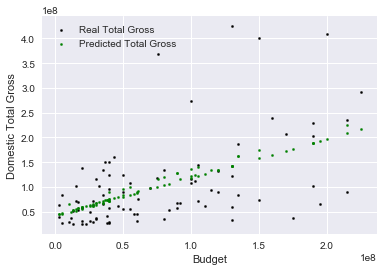

In [92]:
## predicted value
df_lr['PredictedDTG'] = fit.predict(X)
# This predicts Domestic Total Gross

## plot the graph
plt.scatter(df_lr['Budget'], df_lr['DomesticTotalGross'], color='Black', s=5);
plt.xlabel('Budget', verticalalignment='top', horizontalalignment='center');
plt.ylabel('Domestic Total Gross', verticalalignment='bottom', horizontalalignment='center');
plt.scatter(df_lr['Budget'], df_lr['PredictedDTG'], color='green', s=5);
plt.legend(['Real Total Gross', 'Predicted Total Gross'], loc='best');

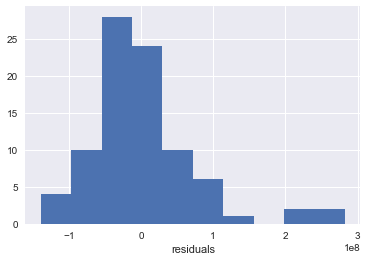

In [93]:
## residuals
df_lr['residuals'] = df_lr['DomesticTotalGross'] - df_lr['PredictedDTG']
plt.hist(df_lr['residuals']);
plt.xlabel('residuals');
# residuals are right-skewed

**Challenge 4**

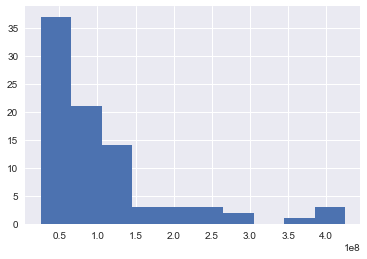

In [98]:
## Domestic Total Gross is right skewed as follow
plt.hist(df['DomesticTotalGross']);

In [99]:
import numpy as np

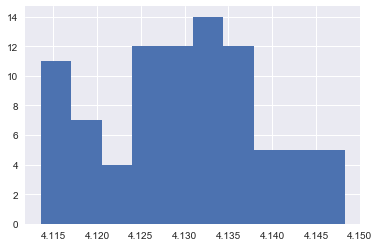

In [118]:
## take a box-cox transformation
from scipy import stats

lamb=stats.boxcox_normmax(df.DomesticTotalGross, brack=(-3, 3), method='mle')
df['DomesticTotalGross_adj']=(np.power(df.DomesticTotalGross,-.238971968344)-1)/-.238971968344
plt.hist(df['DomesticTotalGross_adj']);

In [120]:
## Now, y variable is closer to the normal distribution
df_lr = df[['DomesticTotalGross_adj', 'Budget', 'PG13', 'PG', 'G', 'R']]
df_lr.dropna(inplace=True)

In [122]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross_adj ~ Budget + PG13 + PG + G + R', data=df_lr, return_type="dataframe")
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     DomesticTotalGross_adj   R-squared:                       0.285
Model:                                OLS   Adj. R-squared:                  0.259
Method:                     Least Squares   F-statistic:                     11.01
Date:                    Sun, 28 Jan 2018   Prob (F-statistic):           3.68e-06
Time:                            23:18:01   Log-Likelihood:                 300.22
No. Observations:                      87   AIC:                            -592.4
Df Residuals:                          83   BIC:                            -582.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0926      0.001   2634.476      0.000         3.090     3.095
Budget      8.291e-11   1.62e-11      5.116      0.000      5.07e-11  1.15e-10
PG13           1.0303      0.001    791.664      0.000         1.028     1.033
PG             1.0313      0.002    590.358      0.000         1.028     1.035
G                   0          0        nan        nan             0         0
R              1.0309      0.001    835.488      0.000         1.028     1.033
==============================================================================
Omnibus:                        4.796   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                2.365
Skew:                          -0.077   Prob(JB):                        0.307
Kurtosis:                       2.207   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Challenge 5**

In [123]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [132]:
model = sm.OLS(y_train, X_train)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
y_predict = fit.predict(X_test) 

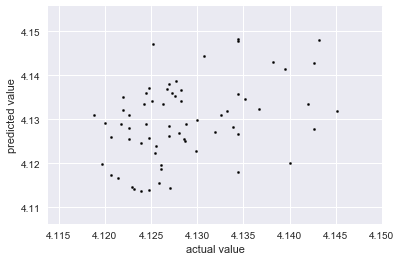

In [135]:
## plot predicted and actual values
plt.scatter(y_predict, y_test, color='Black', s=5);
plt.ylabel('predicted value');
plt.xlabel('actual value');